

> **Prediksi Diabetes Berdasarkan The Behavioral Risk Factor Surveillance System Menggunakan Algoritma Artificial Neural Network**



# **Collect Data and Preprocessing**

In [ ]:
# import library
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

dataset diambil dari Kaggle dengan studi kasus Diabetes dengan link berikut: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?datasetId=1703281&searchQuery=ann&select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv


In [ ]:
# link the dataset from github
url = 'https://raw.githubusercontent.com/alfiyahqz/ANN_diabetesprediction/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

In [ ]:
# read data
df = pd.read_csv(url)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


Studi kasus ini hanya akan berfokus pada sisi kesehatan tubuh sehingga variabel yang berkaitan dengan sisi ekonomi maupun sosial seperti CholCheck, AnyHealthcare, NoDocbcCost, Education, Income akan dihilangkan dari dataset

In [ ]:
# remove unrelated columns
df.drop(['CholCheck', 'AnyHealthcare', 'NoDocbcCost', 'Education', 'Income'], axis='columns', inplace=True)

In [ ]:
df.shape

(70692, 17)

In [ ]:
# checking datatype
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
dtype: object

In [ ]:
# checking for the number of missing values in the dataset
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64

In [ ]:
# checking duplicates data
duplicates = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  6985


,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
360,0.0,0.0,0.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0
397,0.0,1.0,0.0,29.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0
436,0.0,0.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0
474,0.0,0.0,0.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0
514,0.0,0.0,0.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0


In [ ]:
# Handling duplicate data
# removing the rows having duplicate data

df.drop_duplicates(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63707 entries, 0 to 70691
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       63707 non-null  float64
 1   HighBP                63707 non-null  float64
 2   HighChol              63707 non-null  float64
 3   BMI                   63707 non-null  float64
 4   Smoker                63707 non-null  float64
 5   Stroke                63707 non-null  float64
 6   HeartDiseaseorAttack  63707 non-null  float64
 7   PhysActivity          63707 non-null  float64
 8   Fruits                63707 non-null  float64
 9   Veggies               63707 non-null  float64
 10  HvyAlcoholConsump     63707 non-null  float64
 11  GenHlth               63707 non-null  float64
 12  MentHlth              63707 non-null  float64
 13  PhysHlth              63707 non-null  float64
 14  DiffWalk              63707 non-null  float64
 15  Sex                

Setelah dilakukan preprocessing, data akhir yang digunakan untuk studi kasus ini ada 63707 baris dengan 17 kolom variabel

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
count,63707.000000,63707.000000,63707.000000,63707.000000,63707.000000,63707.000000,63707.000000,63707.000000,63707.000000,63707.000000,63707.000000,63707.000000,63707.000000,63707.000000,63707.000000,63707.000000,63707.000000
mean,0.524024,0.584096,0.541762,30.200590,0.491704,0.068846,0.160720,0.677084,0.590233,0.770779,0.046557,2.926821,4.150219,6.415983,0.278321,0.455947,8.616023
std,0.499426,0.492881,0.498257,7.294632,0.499935,0.253195,0.367276,0.467595,0.491794,0.420335,0.210689,1.106620,8.482083,10.384427,0.448176,0.498059,2.858500
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,1.000000,1.000000,1.000000,34.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,7.000000,1.000000,1.000000,11.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000


In [ ]:
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
dtype: int64

**Variabel Dependen**: Diabetes_binary

**Variabel Independen**: HighBP, HighChol, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age


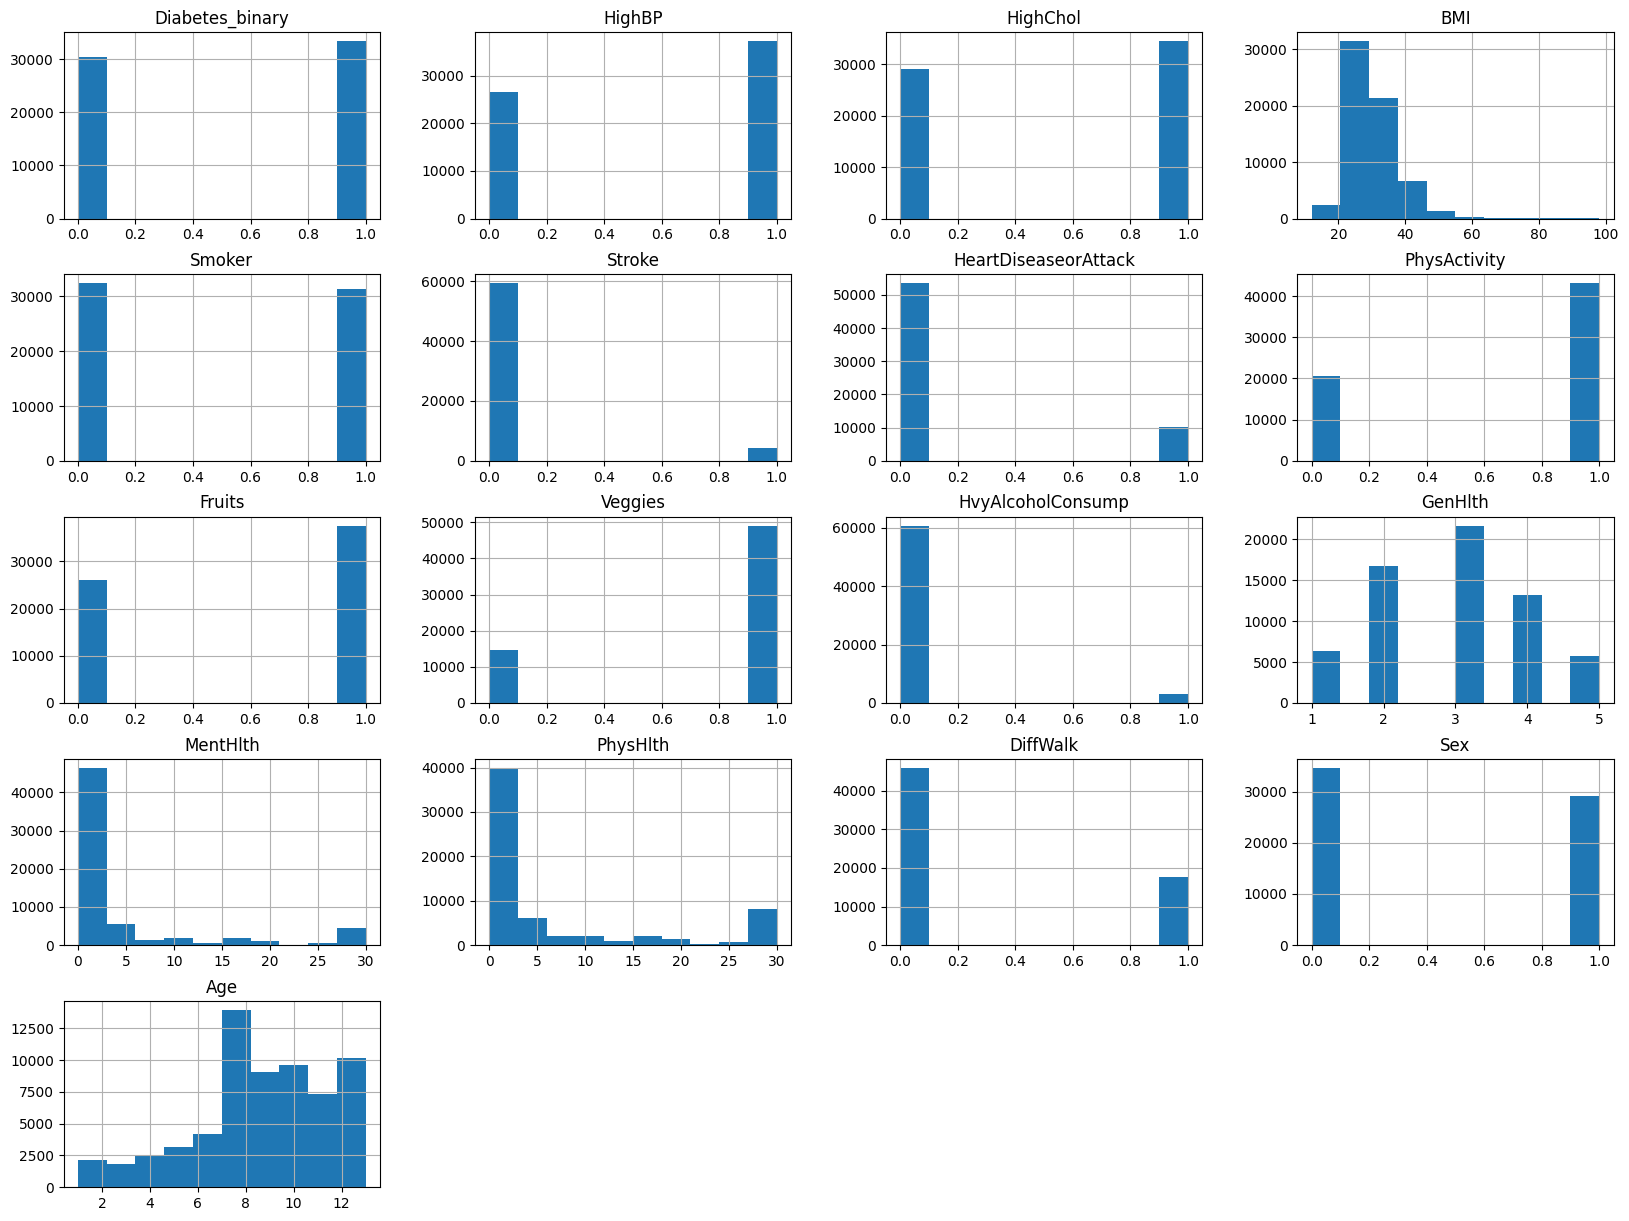

In [ ]:
# visualizing data
df.hist(figsize=(20,15));

In [ ]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Diabetes_binary: [0. 1.]
HighBP: [1. 0.]
HighChol: [0. 1.]
BMI: [26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. 80. 78. 74.]
Smoker: [0. 1.]
Stroke: [0. 1.]
HeartDiseaseorAttack: [0. 1.]
PhysActivity: [1. 0.]
Fruits: [0. 1.]
Veggies: [1. 0.]
HvyAlcoholConsump: [0. 1.]
GenHlth: [3. 1. 2. 4. 5.]
MentHlth: [ 5.  0.  7.  3.  4.  2. 30. 20.  1. 15. 10. 25. 14. 28.  6. 29. 26. 12.
 16. 22. 13.  8.  9. 21. 18. 17. 27. 24. 23. 11. 19.]
PhysHlth: [30.  0. 10.  3.  6.  4. 15.  1.  2. 14.  7. 25. 21. 20.  5.  8. 22. 23.
 29. 12. 18. 28. 26. 24. 27. 11. 13. 16. 17.  9. 19.]
DiffWalk: [0. 1.]
Sex: [1. 0.]
Age: [ 4. 12. 13. 11.  8.  1.  6.  3.  7. 10.  9.  5.  2.]


In [ ]:
# One hot encoding for categorical columns

df1 = pd.get_dummies(data=df, columns=['GenHlth','Age'])
df1.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex',
       'GenHlth_1.0', 'GenHlth_2.0', 'GenHlth_3.0', 'GenHlth_4.0',
       'GenHlth_5.0', 'Age_1.0', 'Age_2.0', 'Age_3.0', 'Age_4.0', 'Age_5.0',
       'Age_6.0', 'Age_7.0', 'Age_8.0', 'Age_9.0', 'Age_10.0', 'Age_11.0',
       'Age_12.0', 'Age_13.0'],
      dtype='object')

In [ ]:
# scalling data

cols_to_scale = ['BMI','MentHlth','PhysHlth']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [ ]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

Diabetes_binary: [0. 1.]
HighBP: [1. 0.]
HighChol: [0. 1.]
BMI: [0.1627907  0.18604651 0.19767442 0.06976744 0.22093023 0.23255814
 0.1744186  0.13953488 0.10465116 0.53488372 0.20930233 0.09302326
 0.11627907 0.30232558 0.3255814  0.15116279 0.27906977 0.40697674
 0.08139535 0.29069767 0.3372093  0.12790698 0.25581395 0.26744186
 0.34883721 0.05813953 0.24418605 0.37209302 0.03488372 0.46511628
 0.6627907  0.51162791 0.38372093 0.31395349 0.93023256 0.47674419
 1.         0.44186047 0.39534884 0.77906977 0.41860465 0.04651163
 0.59302326 0.69767442 0.48837209 0.43023256 0.65116279 0.36046512
 0.8372093  0.70930233 0.74418605 0.5        0.45348837 0.73255814
 0.52325581 0.55813953 0.         0.75581395 0.81395349 0.63953488
 0.68604651 0.56976744 0.02325581 0.80232558 0.54651163 0.86046512
 0.01162791 0.87209302 0.61627907 0.96511628 0.89534884 0.58139535
 0.60465116 0.62790698 0.84883721 0.6744186  0.8255814  0.79069767
 0.76744186 0.72093023]
Smoker: [0. 1.]
Stroke: [0. 1.]
HeartDise

# **ANN**



> **Split Data**



In [ ]:
# initialize variabel dependent and independent
X = df1.drop('Diabetes_binary',axis='columns')
y = df1['Diabetes_binary']

# split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=5)

In [ ]:
X_train.shape

(47780, 32)

In [ ]:
X_test.shape

(15927, 32)

Ukuran data yang digunakan memiliki perbandingan 1:3 dengan jumlah data training 47.780 dan data testing 15.927

Adapun setelah proses conversi data dan scaling data didapatkan 32 variabel yang akan digunakan untuk proses training dan testing

In [ ]:
# data training
X_train[:10]

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,Age_4.0,Age_5.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0,Age_10.0,Age_11.0,Age_12.0,Age_13.0
16350,0.0,1.0,0.255814,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
45941,0.0,1.0,0.220930,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,0
37266,0.0,0.0,0.232558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
7572,0.0,1.0,0.104651,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
49797,1.0,1.0,0.232558,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
26654,0.0,1.0,0.220930,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,0
61934,1.0,0.0,0.232558,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
972,1.0,1.0,0.197674,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
65572,1.0,0.0,0.302326,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
56399,1.0,1.0,0.267442,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
len(X_train.columns)

32

## **Build ANN model with tensorflow/keras**

ANN adalah sistem komputasi multi-layer layaknya jaringan saraf biologis seperti otak manusia. Multi-layer pada ANN tersusun atas input layer, middle layer, dan output layer seperti gambar berikut:

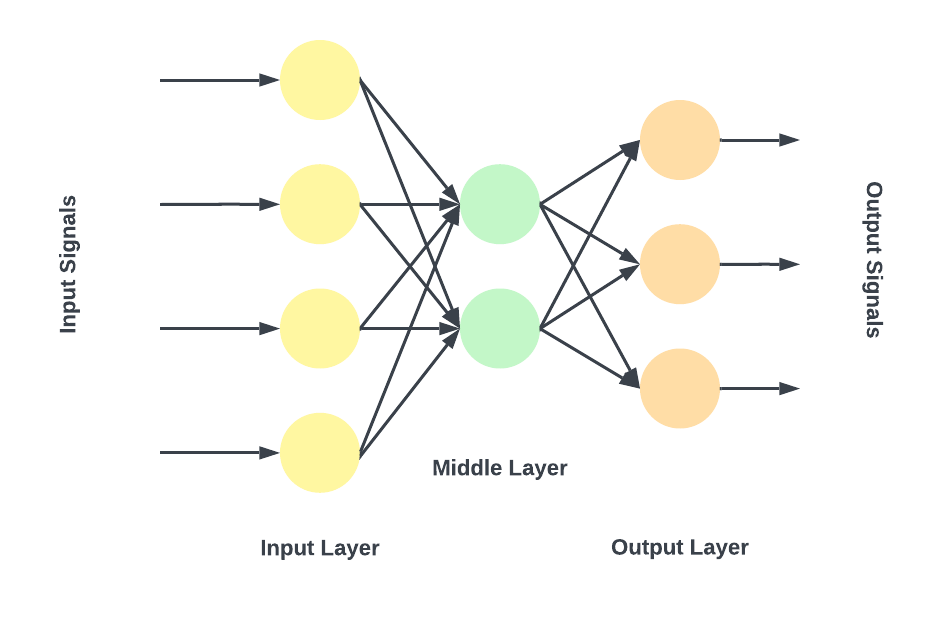

ANN terdiri dari sekelompok node atau neuron, yang secara kasar memodelkan neuron di otak manusia. Neuron dihubungkan oleh tautan berbobot (weight) yang mengirimkan sinyal dari satu neuron ke neuron lainnya seperti gambar di bawah:

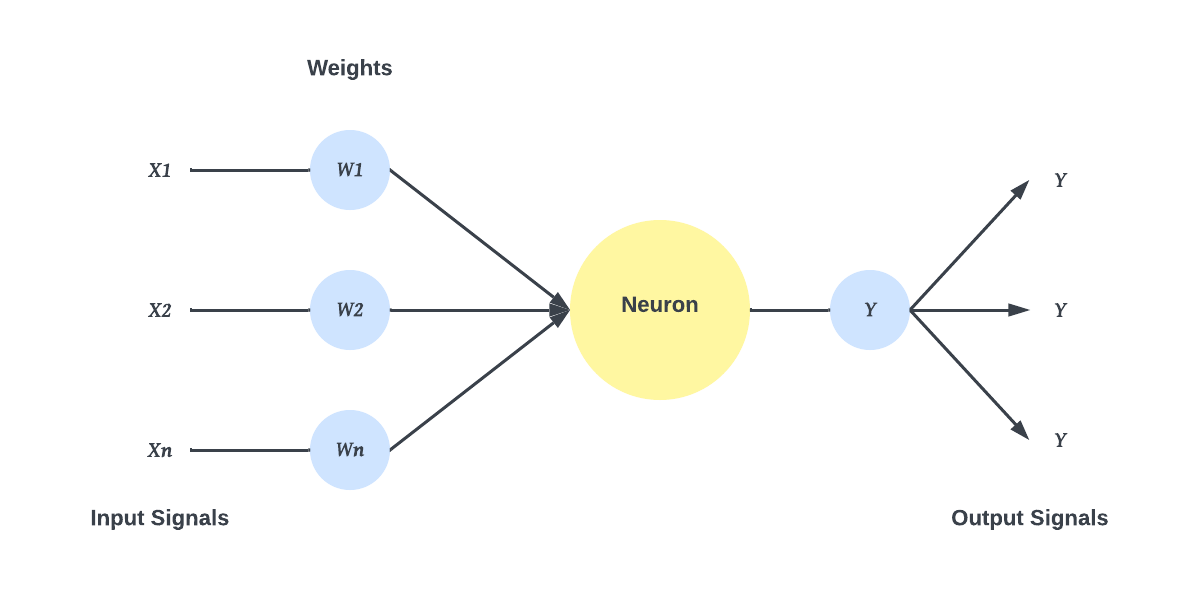

In [ ]:
# import keras library from tensorflow
import tensorflow as tf
from tensorflow import keras
from keras import callbacks

# creates a sequential neural network model with four layers
model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(32,), activation='swish', name='Input_Layer'),
    keras.layers.Dense(16, activation='swish', name='Hidden_Layer'),
    keras.layers.Dense(8, activation='swish', name='Hidden_Layer2'),
    keras.layers.Dense(1, activation='sigmoid', name='Output_Layer')
])

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback will stop the training if the validation loss doesn't improve for 30 epochs
earlystopping = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs = 100, callbacks =[earlystopping])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 32)                1056      
                                                                 
 Hidden_Layer (Dense)        (None, 16)                528       
                                                                 
 Hidden_Layer2 (Dense)       (None, 8)                 136       
                                                                 
 Output_Layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1494/1494 [==============================] - 6s 3ms/step - loss: 0.5518 - accuracy: 0.7181 - val_loss: 0.5393 - val_accuracy: 0.7257
Epoch 2/100
1494/1494 [==================



> **Evaluation**



In [ ]:
# evaluates the performance of a trained neural network model
model.evaluate(X_test, y_test)

498/498 [==============================] - 1s 2ms/step - loss: 0.5316 - accuracy: 0.7350


[0.5315611362457275, 0.7349783182144165]

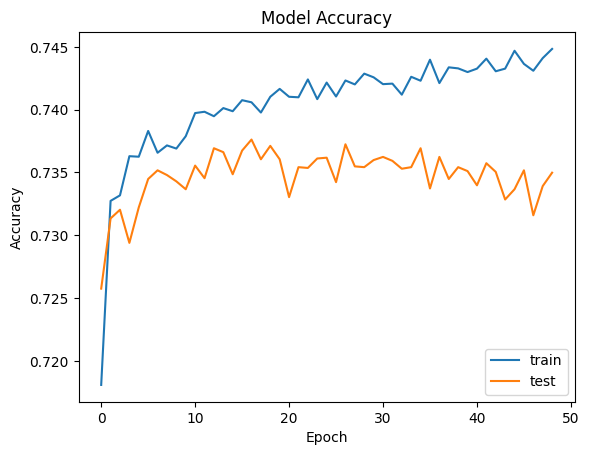

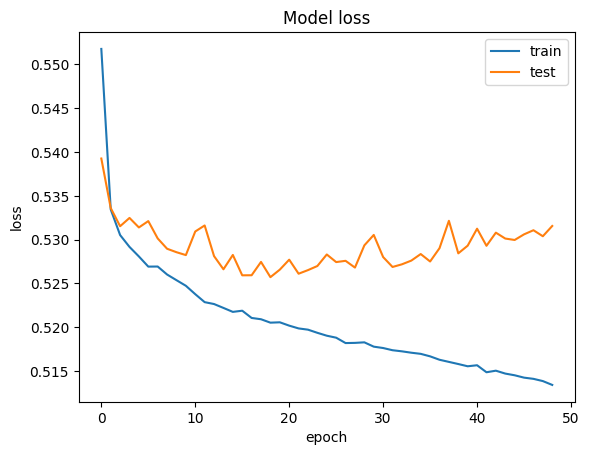

In [ ]:
# summarize history for acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
print('Max val_acc achieved: %.2f' %(max(history.history['val_accuracy'])*100), '%')
print('Max acc achieved: %.2f' %(max(history.history['accuracy'])*100), '%')

Max val_acc achieved: 73.76 %
Max acc achieved: 74.48 %


In [ ]:
print('Final val_acc achieved: %.2f' %(history.history['val_accuracy'][-1]*100), '%')
print('Final acc achieved: %.2f' %(history.history['accuracy'][-1]*100), '%')

Final val_acc achieved: 73.50 %
Final acc achieved: 74.48 %


In [ ]:
# predicts the output of the trained neural network model
yp = model.predict(X_test)
yp[:5]

498/498 [==============================] - 1s 2ms/step


array([[0.10569361],
       [0.8757673 ],
       [0.23567572],
       [0.5321562 ],
       [0.739141  ]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 1, 0, 1, 0]

In [ ]:
# true labels corresponding to the input test data
y_test[:10]

6297     0.0
51950    1.0
758      0.0
40994    1.0
66623    1.0
61464    1.0
53348    1.0
22587    0.0
3491     0.0
11850    0.0
Name: Diabetes_binary, dtype: float64

In [ ]:
# calculates the classification performance
# of the predicted and true class labels

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.66      0.70      7573
         1.0       0.72      0.80      0.76      8354

    accuracy                           0.73     15927
   macro avg       0.74      0.73      0.73     15927
weighted avg       0.74      0.73      0.73     15927



Text(58.222222222222214, 0.5, 'Truth')

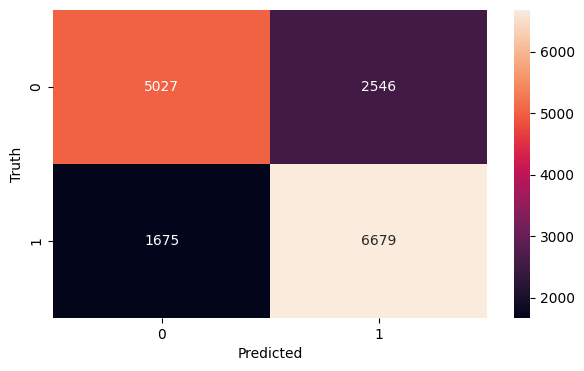

In [ ]:
# generate confusion matrix
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (7,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')



> **Manual Calculation**



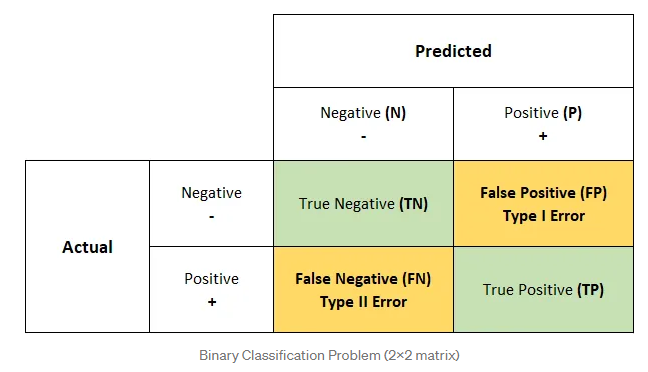

Berdasarkan Confusion Matrix ANN diketahui bahwa:

1. TN = 5027
2. TP = 6679
3. FN = 1675
4. FP = 2546
5. Total = 15927

In [ ]:
# Accuracy
# TN+TP / Total
round((5027+6679)/(5027+6679+1675+2546),2)

0.73

In [ ]:
# Precision for 0 class. i.e. Precision for customers who has no diabetes
# TN / TN+FN
round(5027/(5027+1675),2)

0.75

In [ ]:
# Precision for 1 class. i.e. Precision for customers who has diabetes
# TP / TP+FP
round(6679/(6679+2546),2)

0.72

In [ ]:
# Recall for 0 class
# TN / TN+FP
round(5027/(5027+2546),2)

0.66

In [ ]:
# Recall for 1 class
# TP / TP+FN
round(6679/(6679+1675),2)

0.8

In [ ]:
# F1 score for 0 class
# 2 * (Recall * Precision) / (Recall+Precision)
round(2*(0.66*0.75)/(0.66+0.75),2)

0.7

In [ ]:
# F1 score for 1 class
round(2*(0.8*0.72)/(0.8+0.72),2)

0.76



> **ROC Visualisasi**





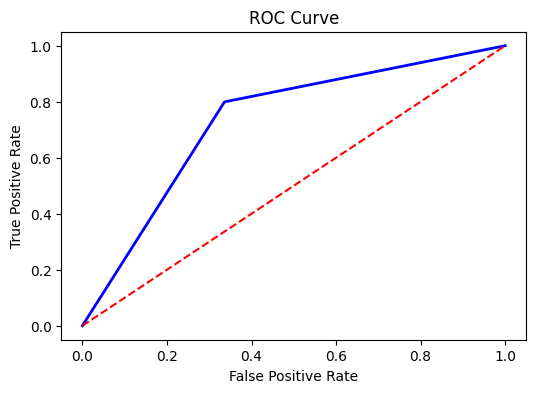

In [ ]:
# ROC (Receiver Operating Characteristic)
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'blue')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC Score: {:.2f}'.format(roc_auc))

ROC AUC Score: 0.73
